# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "bonus" - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

In [1]:
# Importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [3]:
# Check the shape of te dataset
df.shape

(9540, 10)

In [4]:
# Lets describe the data
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


**HANDLING MISSING DATA**

In [5]:
# Check for any missing value
df.isna()
df.isna().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

> The above descriptive statistics shows that there is null missing values in the given dataset.

In [6]:
df.columns

Index(['department', 'promoted', 'review', 'projects', 'salary', 'tenure',
       'satisfaction', 'bonus', 'avg_hrs_month', 'left'],
      dtype='object')

**DATASET EXPLORATION**

In [7]:
# convert 'left' column to integer
df.left = df.left.replace({'yes': 1, 'no': 0})

In [8]:
df.head(10)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,0
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,0
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,0
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,0
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,0
5,IT,0,0.683206,2,medium,5.0,0.565252,1,178.841879,0
6,admin,0,0.620158,4,high,5.0,0.686951,0,181.142956,0
7,support,0,0.499567,4,medium,7.0,0.720451,1,184.977538,0
8,sales,0,0.652818,4,low,6.0,0.678696,0,183.655790,0
9,sales,0,0.642031,3,medium,6.0,0.623365,0,181.851000,0


In [9]:
# Renaming certain columns for better readability
df = df.rename(columns={'left' : 'turnover'})

In [10]:
# Turnover ratio
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.708176
1    0.291824
Name: turnover, dtype: float64

> The turnover rate implies that approximately **70% of the employers stayed** while ***30% of the employers left**

In [11]:
# Overview of Turnover VS Non-turnover
turnover_overview = df.groupby('turnover')
turnover_overview.mean()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
turnover,,,,,,,
0,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
1,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,turnover
promoted,1.000000,0.001879,0.010107,0.001410,-0.011704,0.001072,-0.002190,-0.036777
review,0.001879,1.000000,0.000219,-0.184133,-0.349778,-0.003627,-0.196096,0.304294
projects,0.010107,0.000219,1.000000,0.022596,0.002714,0.002654,0.021299,-0.012408
tenure,0.001410,-0.184133,0.022596,1.000000,-0.146246,-0.000392,0.978618,0.010521
satisfaction,-0.011704,-0.349778,0.002714,-0.146246,1.000000,0.000704,-0.143142,-0.009721
bonus,0.001072,-0.003627,0.002654,-0.000392,0.000704,1.000000,-0.000370,-0.011485
avg_hrs_month,-0.002190,-0.196096,0.021299,0.978618,-0.143142,-0.000370,1.000000,0.009008
turnover,-0.036777,0.304294,-0.012408,0.010521,-0.009721,-0.011485,0.009008,1.000000


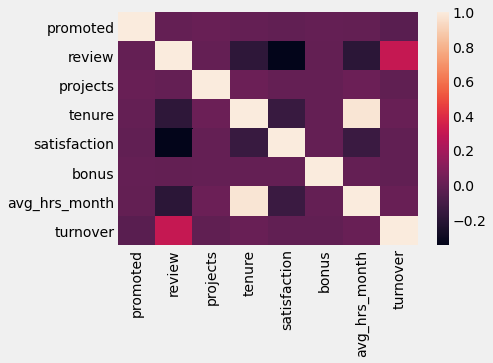

In [12]:
# Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

> From the heatmap, there is a positive(+) correlation between avg_hr_month and tenure. Which could mean that the employees who spent more hours working were evaluated highly in correlation with their total number of years spent in the organization.

> For the negative(-) relationships, review, tenure, avg_hr_month and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied, have a poor review and has spent more time in the comp.

**DATA VISUALIZATION**


Text(0, 0.5, 'Employee Count')

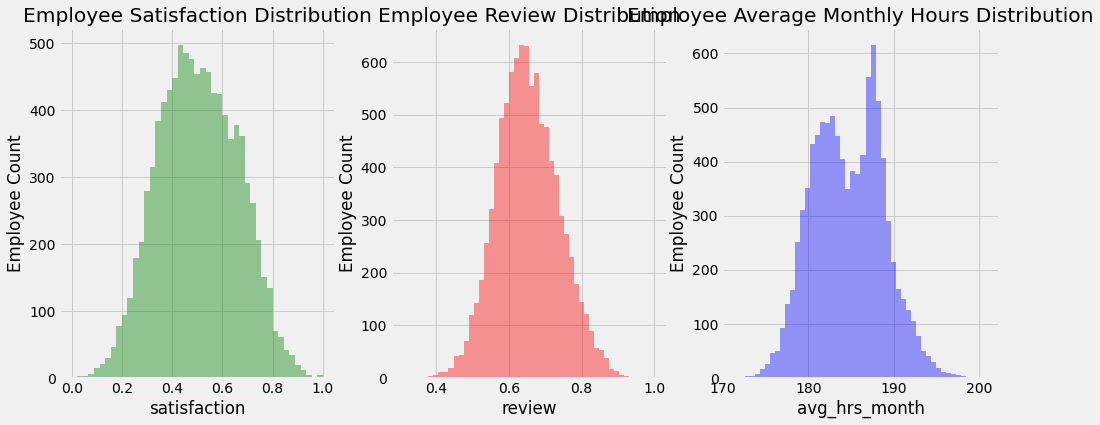

In [13]:
# **DISTRIBUTION PLOT**
# (Satisfaction - Review - avg_hrs_month)

# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Review
sns.distplot(df.review, kde=False, color="r", ax=axes[1]).set_title('Employee Review Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.avg_hrs_month, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

> **Satisfaction** - There is a huge spike for employees with both low satisfaction and high satisfaction.
>> **Review** - There is a bimodal distrubtion of employees for both low review (less than 0.6) and high reviews (less than 0.6)
>>> **avg_hrs_month** - Ther is an equal number of hours spent for all employers.


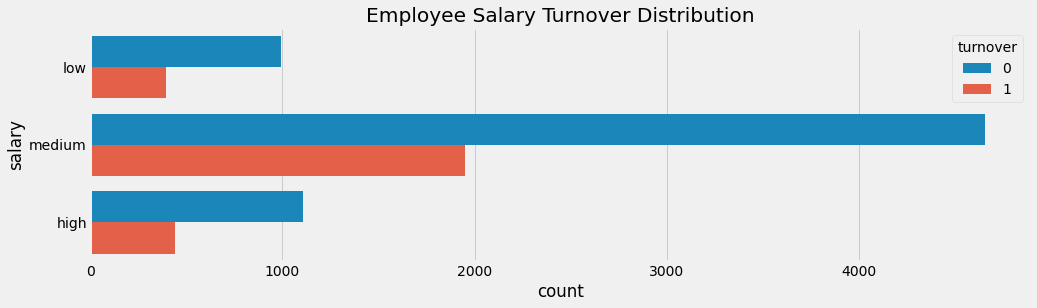

In [14]:
# Salary VS Turnover

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

> Majority of employees who left had medium salary.
>> Few employees left with high and low salaries
>>> Employees with average salary tend to leave the company.

**1.Which department has the highest employee turnover? Which one has the lowest?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'operations'),
  Text(1, 0, 'support'),
  Text(2, 0, 'logistics'),
  Text(3, 0, 'sales'),
  Text(4, 0, 'IT'),
  Text(5, 0, 'admin'),
  Text(6, 0, 'engineering'),
  Text(7, 0, 'marketing'),
  Text(8, 0, 'finance'),
  Text(9, 0, 'retail')])

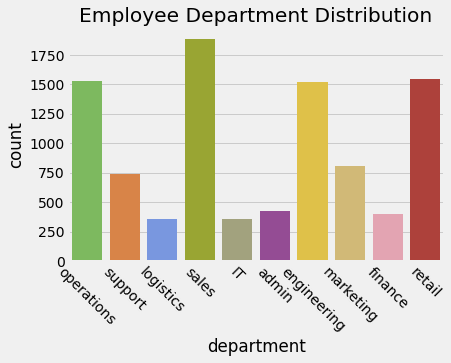

In [15]:
# Department VS Turnover

# Employee dist
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (Bar Plot)
sns.countplot(x='department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

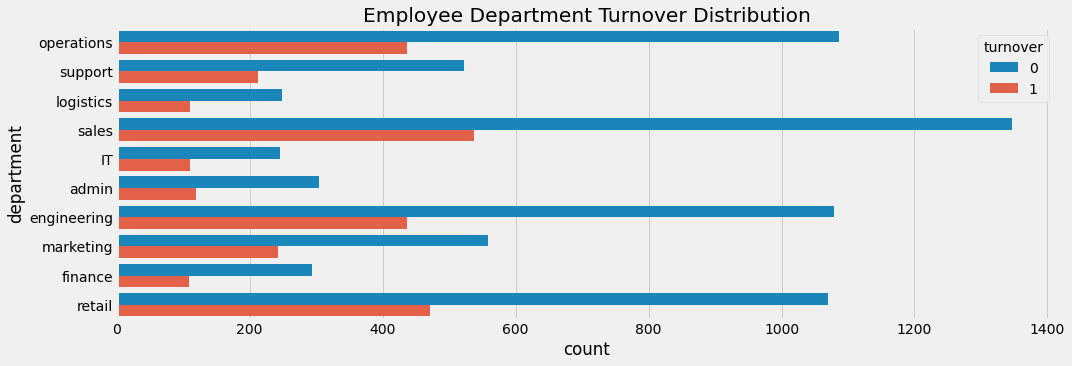

In [16]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="department", hue='turnover', data=df).set_title('Employee Department Turnover Distribution');

**SALES DEPARTMENT has the highest turnover**

**FINANCE DEPARTMENT has the lowest turnover**

* **The sales, retail, operations, and engineering department were the top 4 departments to have employee turnover.**

* **The finance department had the smallest amount of turnover**

> Now lets look at the cause of each department turnover, can we pinpoint a more direct cause for employee turnover?

[Text(0, 0.5, 'Percent')]

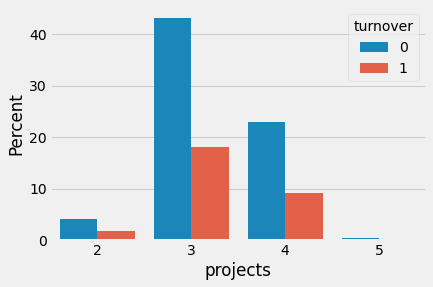

In [17]:
ax = sns.barplot(x="projects", y="projects", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

**Summary:** Let's examine the distribution on some of the employee's features. Here's what I found:

* Majority of the employees who did not leave the company had 2,3,4, and 5 projects
* There is an decrease in employee turnover rate as project count increases

Text(0.5, 1.0, 'Employee Review Distribution - Turnover V.S. No Turnover')

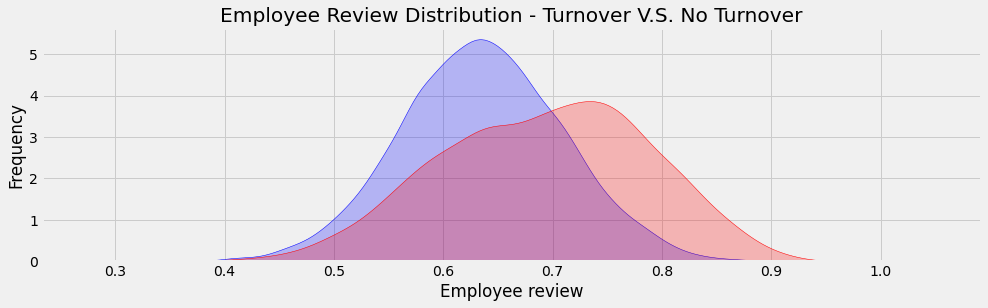

In [18]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'review'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'review'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee review', ylabel='Frequency')
plt.title('Employee Review Distribution - Turnover V.S. No Turnover')

* Employees with low performance tend to leave the company
* Employees with relatively high performance tend to leave the company more
* The sweet spot for employees that stayed is within 0.55-0.65 evaluation

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

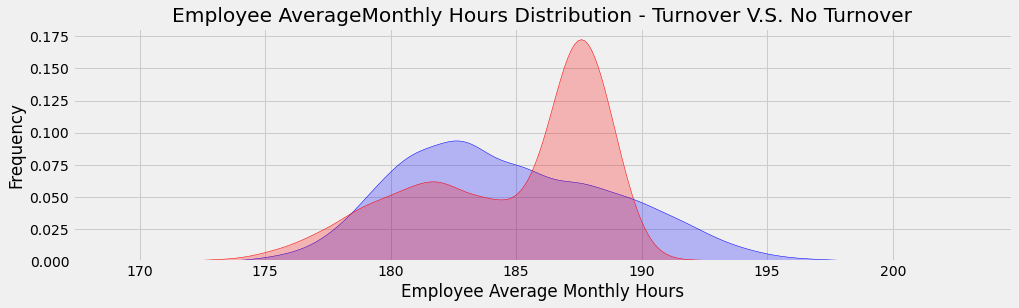

In [19]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'avg_hrs_month'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'avg_hrs_month'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

* Employees who had less hours of work (~183hours or less) left the company
* Employees who had too many hours of work (~185 or more) left the company more
* Employees who left generally were underworked and more overworked.

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

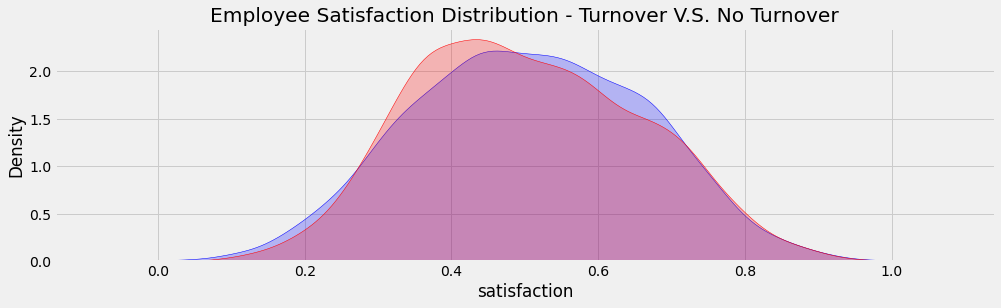

In [20]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

* Employees who had really low satisfaction levels (0.36 - 0.4) left the company more
* Employees who had medium to high satisfaction levels (0.4 - 1.0) left the company more

<AxesSubplot:xlabel='projects', ylabel='review'>

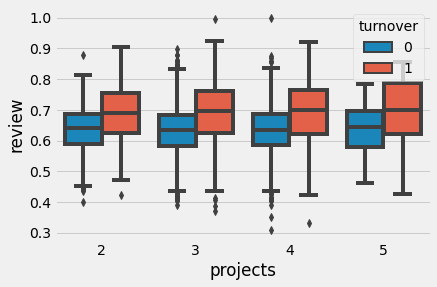

In [21]:
sns.boxplot(x="projects", y="review", hue="turnover", data=df)

> What I find strange with this graph is with the turnover group. There is an increase in review for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent review score despite the increase in project counts.

[Text(0, 0.5, 'Percent')]

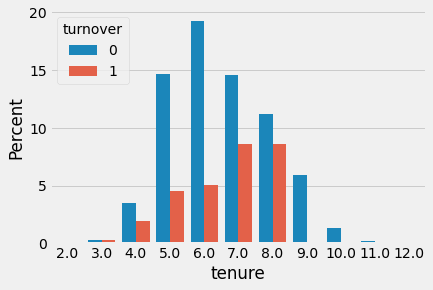

In [22]:
ax = sns.barplot(x="tenure", y="tenure", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

* More employees with 3 years left the company
* More than half of the employees with 4, 7 and 8 years left the company
* Employees with 3, 7-8 years should highly be looked into

<AxesSubplot:xlabel='turnover', ylabel='tenure'>

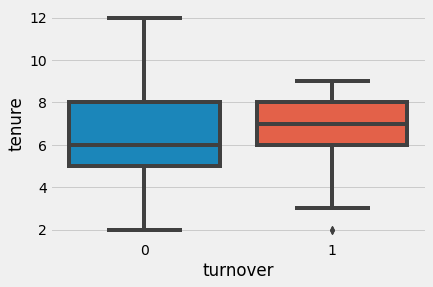

In [23]:
sns.boxplot(y=df.tenure,x=df.turnover)

> From the boxplot, we can see that more employers left at exactly 7 - 8 years which should be properly looked into

**K-Means Clustering of Employee Turnover**

**Cluster 1 (Blue):** Hard-working and Sad Employees

**Cluster 2 (Red):** Bad and Sad Employee

**Cluster 3 (Green):** Hard-working and Happy Employee

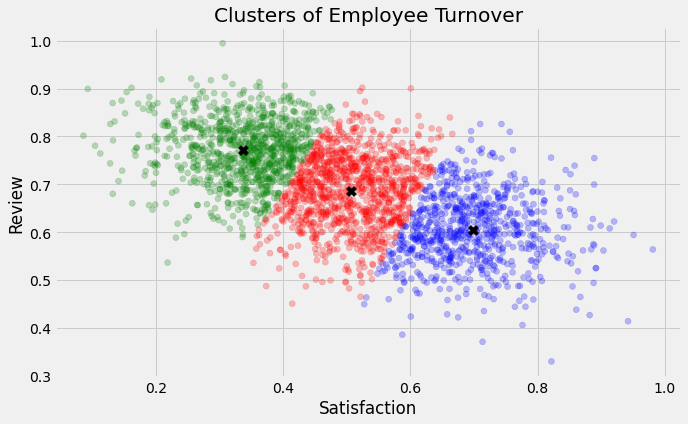

In [24]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","review"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="review", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Review")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()


 **2. Investigate which variables seem to be better predictors of employee departure.**

**FEATURE IMPORTANCE**

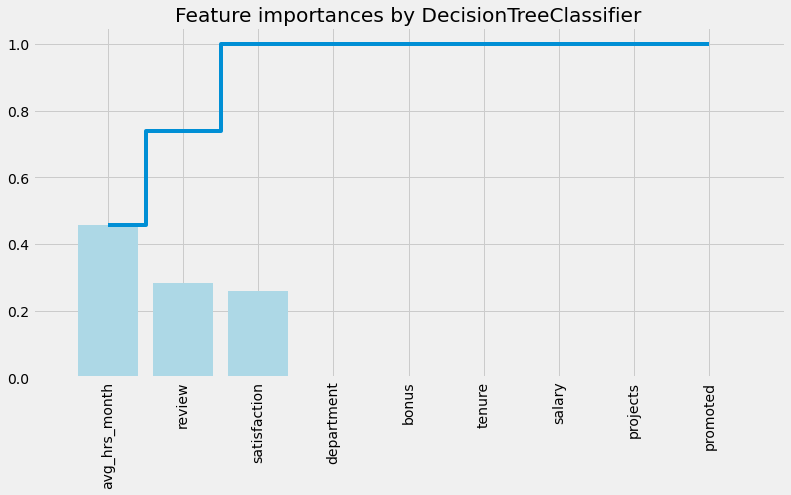

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['turnover'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

**Summary:**

By using a decision tree classifier, it could rank the features used for the prediction. The top three features were employee avg_hrs_month, review, and satisfaction. This is helpful in creating our model for logistic regression because it’ll be more interpretable to understand what goes into our model when we utilize less features.

**Top 3 Features:**

* Avg_hrs_month
* Review
* Satisfaction.

  **Modeling the Data: Logistic Regression Analysis**

Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. This model is commonly used to predict the likelihood of an event occurring.

This will be an in-depth analysis of using logistic regression as a classifier. I do go over other types of models in the other section below this. This is more of a use-case example of what can be done and explained to management in a company.

This is a useful model to take advantage of for this problem because we are interested in predicting whether an employee will leave (0) or stay (1).

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['avg_hrs_month', 'review', 'satisfaction', 'int', 'turnover']
df = df[indep_var]

# Create train and test splits
target_name = 'turnover'
X = df.drop('turnover', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()


,avg_hrs_month,review,satisfaction,int
6969,187.796408,0.629048,0.312792,1
8084,193.518538,0.795809,0.596649,1
8229,187.586024,0.580439,0.484658,1
6068,188.062576,0.727317,0.457950,1
4841,192.343208,0.586693,0.551384,1


In [27]:
import statsmodels.api as sm
iv = ['avg_hrs_month', 'review', 'satisfaction', 'int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.543203
         Iterations 6


avg_hrs_month     0.061653
review           11.104666
satisfaction      2.488504
int             -20.897861
dtype: float64

**Using Logistic Regression Coefficients**
With the elimination of the other variables, I’ll be using the three most important features to create our model: avg_hrs_month, review, and satisfaction.

* Following overall equation was developed:

Employee Turnover Score = avg_hrs_month(0.061653) + review(11.104666) + satisfaction*(2.488504) + 0.543203

The values above are the coefficient assigned to each independent variable. The constant 0.543203 represents the effect of all uncontrollable variables.

In [28]:
# Create function to compute coefficients
coef = answer.params
def y (coef, avg_hrs_month, review, satisfaction) : 
    return coef[3] + coef[0]*avg_hrs_month + coef[1]*review + coef[2]*satisfaction


# An Employee with 187 avg_hrs_month and 0.6 review and worked 0.8 satisfaction has a 42% chance of turnover
y1 = y(coef, 187.796408, 0.229048, 0.412792)
p = np.exp(y1) / (1+np.exp(y1))
p

0.003176378514163693

**Intepretation of Score**
If you were to use these employee values into the equation:

* avg_hrs_month: 187.796408
* Review: 0.629048
* Satisfaction: 0.412792

You would get:

Employee Turnover Score = 187.796408*(0.061653) + 0.629048*(11.104666) + 0.412792*(2.488504) + 0.543203 = 21%

Result: This employee would have a 21% chance of leaving the company. This information can then be used to form our retention plan.

**3.What recommendations would you make regarding ways to reduce employee turnover?**


**Summary:** With all of this information, this is what the company should know about the company and why there was a relatively high turnover:

* SALES DEPARTMENT has the highest turnover, FINANCE DEPARTMENT has the lowest turnover
* Majority of the employees who did not leave the company had 2,3,4, and 5 projects count was at risk of leaving the company.
* Employees who had less hours of work (~183hours or less) left the company
* Employees who had too many hours of work (~185hours or more) left the company more
* Employees who left generally were more overworked.
* Employees with really high reviews, avg_hrs_month and less satisfaction should be taken into consideration for high turnover rate
* Employees with medium salaries have the bulk of employee turnover
* Employee with more avg_hrs_month is the highest indicator for employee turnover.
* Employee that had 7 and 8 yearsAtCompany should be taken into consideration for high turnover rate
* Employee avg_hrs_month, review, and satisfaction were the three biggest factors in determining turnover.


## **Potential Solution**

**Binary Classification:** Turnover V.S. Non Turnover

**Instance Scoring:** Likelihood of employee responding to an offer/incentive to save them from leaving.

**Need for Application:** Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.

Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

**Solution 1:**

We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.

**Solution 2:** Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:

* Be a good coach
* Empower the team and do not micromanage
* Express interest for team member success
* Have clear vision / strategy for team
* Help team with career development
* Build workers satisfactions

## ⌛️ Time ticked, Thanks!